# Import Necessary Libreries

In [2]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import plot_confusion_matrix
from matplotlib.colors import ListedColormap
zero_one_colourmap = ListedColormap(('red', 'green'))
from sklearn.decomposition import PCA
import plotly.graph_objects as go
from sklearn.naive_bayes import GaussianNB

## Import Data

In [12]:
pd.set_option('max_columns',None)

In [4]:
salary_train_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Naive_Bayes_Classification/SalaryData_Train.csv")
salary_train_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [11]:
salary_test_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Naive_Bayes_Classification/SalaryData_Test.csv")
salary_test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


## Data Understanding

In [8]:
salary_train_data.shape

(30161, 14)

In [9]:
salary_test_data.shape

(15060, 14)

In [10]:
salary_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [11]:
salary_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [12]:
salary_train_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [13]:
salary_test_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [14]:
salary_train_data.describe(include='all')

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
count,30161.000000,30161,30161,30161.000000,30161,30161,30161,30161,30161,30161.000000,30161.000000,30161.000000,30161,30161
unique,NaN,7,16,NaN,7,14,6,5,2,NaN,NaN,NaN,40,2
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22285,9840,NaN,14065,4038,12463,25932,20380,NaN,NaN,NaN,27504,22653
mean,38.438115,NaN,NaN,10.121316,NaN,NaN,NaN,NaN,NaN,1092.044064,88.302311,40.931269,NaN,NaN
std,13.134830,NaN,NaN,2.550037,NaN,NaN,NaN,NaN,NaN,7406.466611,404.121321,11.980182,NaN,NaN
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [15]:
salary_test_data.describe(include='all')

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
count,15060.000000,15060,15060,15060.000000,15060,15060,15060,15060,15060,15060.000000,15060.000000,15060.000000,15060,15060
unique,NaN,7,16,NaN,7,14,6,5,2,NaN,NaN,NaN,40,2
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Exec-managerial,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,11021,4943,NaN,6990,1992,6203,12970,10147,NaN,NaN,NaN,13788,11360
mean,38.768327,NaN,NaN,10.112749,NaN,NaN,NaN,NaN,NaN,1120.301594,89.041899,40.951594,NaN,NaN
std,13.380676,NaN,NaN,2.558727,NaN,NaN,NaN,NaN,NaN,7703.181842,406.283245,12.062831,NaN,NaN
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


## Outliers Detection

## Train data

## Box Plot

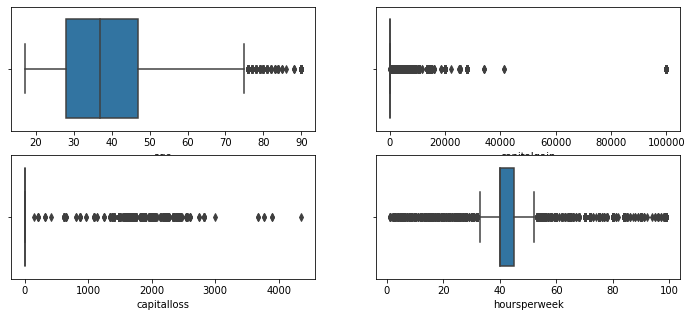

In [5]:
plt.figure(figsize=(12,5))
plt.subplot(2,2,1)
sns.boxplot(salary_train_data["age"])
plt.subplot(2,2,2)
sns.boxplot(salary_train_data["capitalgain"])
plt.subplot(2,2,3)
sns.boxplot(salary_train_data["capitalloss"])
plt.subplot(2,2,4)
sns.boxplot(salary_train_data["hoursperweek"])
plt.show()

## Outliers Treatments

In [6]:
q3,q1=np.percentile(salary_train_data["age"],[75,25])
iqr=q3-q1
whiskers=q3+(1.5*iqr)
salary_train_data["age"]=salary_train_data["age"].clip(upper=whiskers)

In [7]:
q3,q1=np.percentile(salary_train_data["capitalgain"],[75,25])
iqr=q3-q1
whiskers=q3+(1.5*iqr)
salary_train_data["capitalgain"]=salary_train_data["capitalgain"].clip(upper=whiskers)

In [8]:
q3,q1=np.percentile(salary_train_data["capitalloss"],[75,25])
iqr=q3-q1
whiskers=q3+(1.5*iqr)
salary_train_data["capitalloss"]=salary_train_data["capitalloss"].clip(upper=whiskers)

In [9]:
q3,q1=np.percentile(salary_train_data["hoursperweek"],[75,25])
iqr=q3-q1
up_whiskers=q3+(1.5*iqr)
lw_whiskers=q1-(1.5*iqr)
salary_train_data["hoursperweek"]=salary_train_data["hoursperweek"].clip(upper=up_whiskers)
salary_train_data["hoursperweek"]=salary_train_data["hoursperweek"].clip(lower=lw_whiskers)

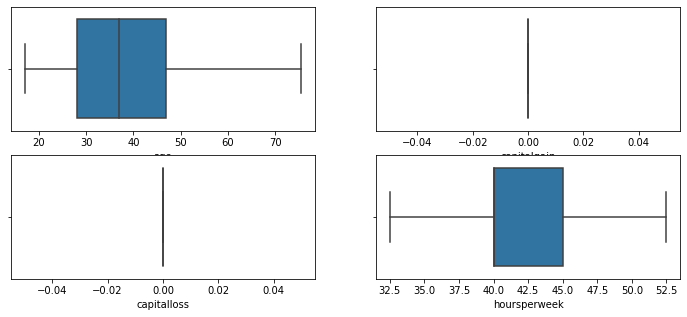

In [10]:
plt.figure(figsize=(12,5))
plt.subplot(2,2,1)
sns.boxplot(salary_train_data["age"])
plt.subplot(2,2,2)
sns.boxplot(salary_train_data["capitalgain"])
plt.subplot(2,2,3)
sns.boxplot(salary_train_data["capitalloss"])
plt.subplot(2,2,4)
sns.boxplot(salary_train_data["hoursperweek"])
plt.show()

## Test data

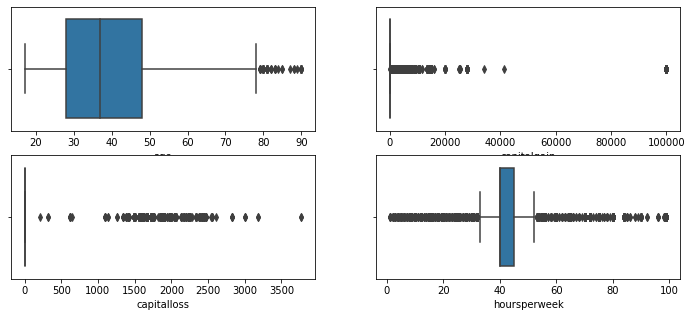

In [13]:
plt.figure(figsize=(12,5))
plt.subplot(2,2,1)
sns.boxplot(salary_test_data["age"])
plt.subplot(2,2,2)
sns.boxplot(salary_test_data["capitalgain"])
plt.subplot(2,2,3)
sns.boxplot(salary_test_data["capitalloss"])
plt.subplot(2,2,4)
sns.boxplot(salary_test_data["hoursperweek"])
plt.show()

In [14]:
q3,q1=np.percentile(salary_test_data["age"],[75,25])
iqr=q3-q1
whiskers=q3+(1.5*iqr)
salary_test_data["age"]=salary_test_data["age"].clip(upper=whiskers)

In [15]:
q3,q1=np.percentile(salary_test_data["capitalgain"],[75,25])
iqr=q3-q1
whiskers=q3+(1.5*iqr)
salary_test_data["capitalgain"]=salary_test_data["capitalgain"].clip(upper=whiskers)

In [16]:
q3,q1=np.percentile(salary_test_data["capitalloss"],[75,25])
iqr=q3-q1
whiskers=q3+(1.5*iqr)
salary_test_data["capitalloss"]=salary_test_data["capitalloss"].clip(upper=whiskers)

In [17]:
q3,q1=np.percentile(salary_test_data["hoursperweek"],[75,25])
iqr=q3-q1
up_whiskers=q3+(1.5*iqr)
lw_whiskers=q1-(1.5*iqr)
salary_test_data["hoursperweek"]=salary_test_data["hoursperweek"].clip(upper=up_whiskers)
salary_test_data["hoursperweek"]=salary_test_data["hoursperweek"].clip(lower=lw_whiskers)

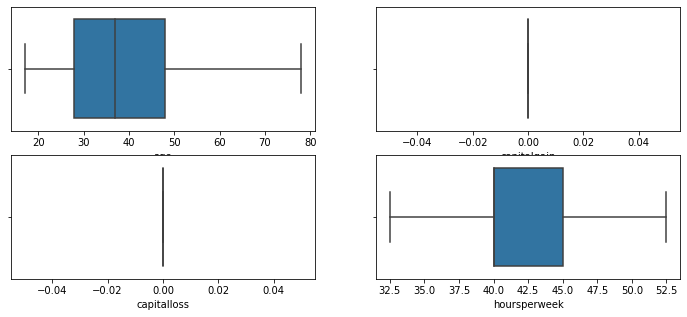

In [18]:
plt.figure(figsize=(12,5))
plt.subplot(2,2,1)
sns.boxplot(salary_test_data["age"])
plt.subplot(2,2,2)
sns.boxplot(salary_test_data["capitalgain"])
plt.subplot(2,2,3)
sns.boxplot(salary_test_data["capitalloss"])
plt.subplot(2,2,4)
sns.boxplot(salary_test_data["hoursperweek"])
plt.show()

## **Observation**


### Outliers got treated

## Checking for Imbalanced Dataset

**Train data**

In [19]:
salary_train_data.Salary.value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

# Plots

### Bar plot

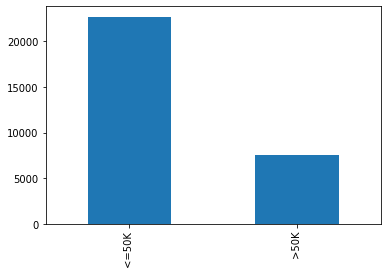

In [20]:
salary_train_data.Salary.value_counts().plot(kind='bar')

### PIE plot

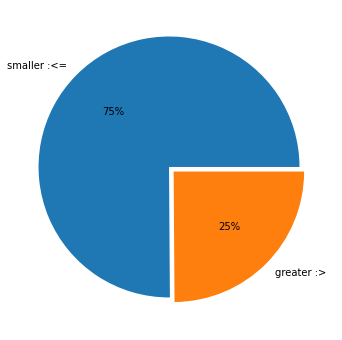

In [21]:
plt.figure(figsize=(10,6))
plt.pie(x=salary_train_data.Salary.value_counts(),explode=[0.03,0.02],labels=["smaller :<=","greater :>"],autopct='%1.0f%%')
plt.show()

In [22]:
labels = ["Small","Large"]
values =salary_train_data.Salary.value_counts()
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0.2, 0])])
fig.show()

## Test data

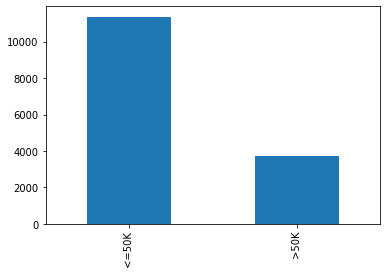

In [23]:
salary_test_data.Salary.value_counts().plot(kind='bar')

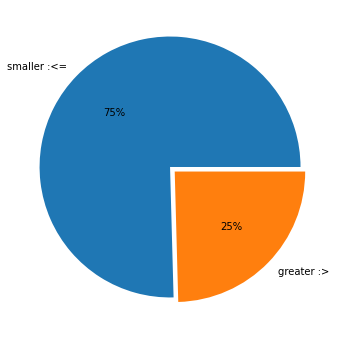

In [24]:
plt.figure(figsize=(10,6))
plt.pie(x=salary_test_data.Salary.value_counts(),explode=[0.03,0.02],labels=["smaller :<=","greater :>"],autopct='%1.0f%%')
plt.show()

In [25]:
labels = ["Small","Large"]
values =salary_test_data.Salary.value_counts()
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0.2, 0])])
fig.show()

### Observation 
### This is a imbalanced data set 
###  so we need to Adjust class weights in the model building Algorithm

## Correlation Matrix and Heatmap

In [26]:
corr=salary_train_data.corr().replace(np.NaN,0)
corr

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.044236,0.0,0.0,0.110564
educationno,0.044236,1.000000,0.0,0.0,0.181071
capitalgain,0.000000,0.000000,0.0,0.0,0.000000
capitalloss,0.000000,0.000000,0.0,0.0,0.000000
hoursperweek,0.110564,0.181071,0.0,0.0,1.000000


In [27]:
corr_1=salary_test_data.corr().replace(np.NaN,0)
corr_1

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.026382,0.0,0.0,0.108147
educationno,0.026382,1.000000,0.0,0.0,0.171430
capitalgain,0.000000,0.000000,0.0,0.0,0.000000
capitalloss,0.000000,0.000000,0.0,0.0,0.000000
hoursperweek,0.108147,0.171430,0.0,0.0,1.000000


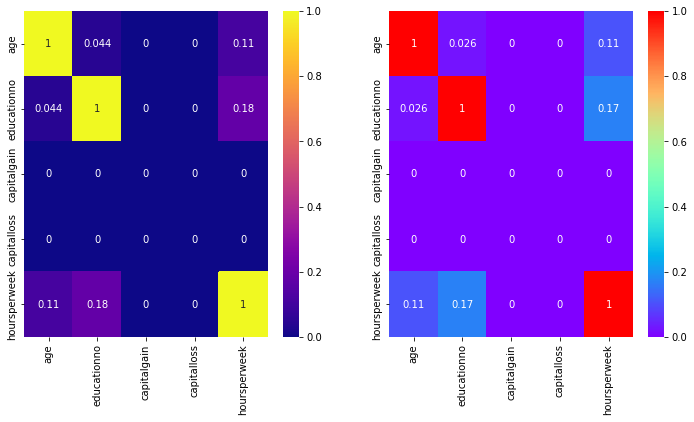

In [28]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.heatmap(salary_train_data.corr().replace(np.NaN,0),annot=True,cmap='plasma')
plt.subplot(1,2,2)
sns.heatmap(salary_test_data.corr().replace(np.NaN,0),annot=True,cmap='rainbow')
plt.show()

In [29]:
plt.figure(figsize=(10,4))
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.00,0.04,0.00,0.00,0.11
educationno,0.04,1.00,0.00,0.00,0.18
capitalgain,0.00,0.00,0.00,0.00,0.00
capitalloss,0.00,0.00,0.00,0.00,0.00
hoursperweek,0.11,0.18,0.00,0.00,1.00


<Figure size 720x288 with 0 Axes>

In [30]:
plt.figure(figsize=(10,4))
corr_1.style.background_gradient(cmap='coolwarm').set_precision(2)

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.00,0.03,0.00,0.00,0.11
educationno,0.03,1.00,0.00,0.00,0.17
capitalgain,0.00,0.00,0.00,0.00,0.00
capitalloss,0.00,0.00,0.00,0.00,0.00
hoursperweek,0.11,0.17,0.00,0.00,1.00


<Figure size 720x288 with 0 Axes>

# Data Preprocessing

In [31]:
salary_train_data.dtypes

age              float64
workclass         object
education         object
educationno        int64
maritalstatus     object
occupation        object
relationship      object
race              object
sex               object
capitalgain      float64
capitalloss      float64
hoursperweek     float64
native            object
Salary            object
dtype: object

In [32]:
salary_train_data["workclass"]=salary_train_data["workclass"].astype("category")
salary_train_data["education"]=salary_train_data["education"].astype("category")
salary_train_data["maritalstatus"]=salary_train_data["maritalstatus"].astype("category")
salary_train_data["occupation"]=salary_train_data["occupation"].astype("category")
salary_train_data["relationship"]=salary_train_data["relationship"].astype("category")
salary_train_data["race"]=salary_train_data["race"].astype("category")
salary_train_data["sex"]=salary_train_data["sex"].astype("category")
salary_train_data["native"]=salary_train_data["native"].astype("category")
salary_train_data["Salary"]=salary_train_data["Salary"].astype("category")

In [33]:
salary_train_data.dtypes

age               float64
workclass        category
education        category
educationno         int64
maritalstatus    category
occupation       category
relationship     category
race             category
sex              category
capitalgain       float64
capitalloss       float64
hoursperweek      float64
native           category
Salary           category
dtype: object

In [34]:
salary_test_data["workclass"]=salary_test_data["workclass"].astype("category")
salary_test_data["education"]=salary_test_data["education"].astype("category")
salary_test_data["maritalstatus"]=salary_test_data["maritalstatus"].astype("category")
salary_test_data["occupation"]=salary_test_data["occupation"].astype("category")
salary_test_data["relationship"]=salary_test_data["relationship"].astype("category")
salary_test_data["race"]=salary_test_data["race"].astype("category")
salary_test_data["sex"]=salary_test_data["sex"].astype("category")
salary_test_data["native"]=salary_test_data["native"].astype("category")
salary_test_data["Salary"]=salary_test_data["Salary"].astype("category")

In [35]:
salary_test_data.dtypes

age               float64
workclass        category
education        category
educationno         int64
maritalstatus    category
occupation       category
relationship     category
race             category
sex              category
capitalgain       float64
capitalloss       float64
hoursperweek      float64
native           category
Salary           category
dtype: object

In [36]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder 

In [37]:
le_enconder=LabelEncoder()

In [38]:
std=StandardScaler()

In [39]:
salary_train_data["workclass"]=le_enconder.fit_transform(salary_train_data["workclass"])
salary_train_data["education"]=le_enconder.fit_transform(salary_train_data["education"])
salary_train_data["maritalstatus"]=le_enconder.fit_transform(salary_train_data["maritalstatus"])
salary_train_data["occupation"]=le_enconder.fit_transform(salary_train_data["occupation"])
salary_train_data["relationship"]=le_enconder.fit_transform(salary_train_data["relationship"])
salary_train_data["race"]=le_enconder.fit_transform(salary_train_data["race"])
salary_train_data["sex"]=le_enconder.fit_transform(salary_train_data["sex"])
salary_train_data["native"]=le_enconder.fit_transform(salary_train_data["native"])
salary_train_data["Salary"]=le_enconder.fit_transform(salary_train_data["Salary"])

In [40]:
salary_test_data["workclass"]=le_enconder.fit_transform(salary_test_data["workclass"])
salary_test_data["education"]=le_enconder.fit_transform(salary_test_data["education"])
salary_test_data["maritalstatus"]=le_enconder.fit_transform(salary_test_data["maritalstatus"])
salary_test_data["occupation"]=le_enconder.fit_transform(salary_test_data["occupation"])
salary_test_data["relationship"]=le_enconder.fit_transform(salary_test_data["relationship"])
salary_test_data["race"]=le_enconder.fit_transform(salary_test_data["race"])
salary_test_data["sex"]=le_enconder.fit_transform(salary_test_data["sex"])
salary_test_data["native"]=le_enconder.fit_transform(salary_test_data["native"])
salary_test_data["Salary"]=le_enconder.fit_transform(salary_test_data["Salary"])

In [41]:
corr_2=salary_train_data.corr().replace(np.NaN,0)

In [42]:
plt.figure(figsize=(10,4))
corr_2.style.background_gradient(cmap='coolwarm').set_precision(2)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.00,0.08,-0.00,0.04,-0.28,-0.01,-0.25,0.02,0.08,0.00,0.00,0.11,-0.00,0.24
workclass,0.08,1.00,0.02,0.04,-0.03,0.02,-0.07,0.04,0.07,0.00,0.00,0.06,0.01,0.02
education,-0.00,0.02,1.00,0.35,-0.04,-0.04,-0.01,0.01,-0.03,0.00,0.00,0.06,0.08,0.08
educationno,0.04,0.04,0.35,1.00,-0.06,0.09,-0.09,0.03,0.01,0.00,0.00,0.18,0.09,0.34
maritalstatus,-0.28,-0.03,-0.04,-0.06,1.00,0.02,0.18,-0.07,-0.12,0.00,0.00,-0.19,-0.03,-0.19
occupation,-0.01,0.02,-0.04,0.09,0.02,1.00,-0.05,0.00,0.06,0.00,0.00,0.03,-0.00,0.05
relationship,-0.25,-0.07,-0.01,-0.09,0.18,-0.05,1.00,-0.12,-0.58,0.00,0.00,-0.28,-0.01,-0.25
race,0.02,0.04,0.01,0.03,-0.07,0.00,-0.12,1.00,0.09,0.00,0.00,0.08,0.13,0.07
sex,0.08,0.07,-0.03,0.01,-0.12,0.06,-0.58,0.09,1.00,0.00,0.00,0.26,0.00,0.22
capitalgain,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


<Figure size 720x288 with 0 Axes>

In [43]:
X_train=salary_train_data.drop(columns="Salary",axis=1)
y_train=salary_train_data[["Salary"]]

In [44]:
X_test=salary_test_data.drop(columns="Salary",axis=1)
y_test=salary_test_data[["Salary"]]

In [45]:
X_scaled=std.fit_transform(X_train)
X_scaled

array([[ 0.04570607,  2.93594688, -0.34982703, ...,  0.        ,
        -0.23094905,  0.26635842],
       [ 0.89014142,  1.88764517, -0.34982703, ...,  0.        ,
        -1.45126669,  0.26635842],
       [-0.03106078, -0.20895825,  0.1748048 , ...,  0.        ,
        -0.23094905,  0.26635842],
       ...,
       [ 1.50427622, -0.20895825,  0.1748048 , ...,  0.        ,
        -0.23094905,  0.26635842],
       [-1.25933039, -0.20895825,  0.1748048 , ...,  0.        ,
        -1.45126669,  0.26635842],
       [ 1.04367512,  0.83934346,  0.1748048 , ...,  0.        ,
        -0.23094905,  0.26635842]])

In [46]:
X_train=pd.DataFrame(data=X_scaled,columns=X_train.columns)

In [47]:
X_test_scaled=std.fit_transform(X_test)
X_test_scaled

array([[-1.03247539, -0.222347  , -2.42343884, ...,  0.        ,
        -0.23013118,  0.26058067],
       [-0.05621783, -0.222347  ,  0.19017232, ...,  0.        ,
         1.39768132,  0.26058067],
       [-0.80718519, -1.25712632, -0.85527215, ...,  0.        ,
        -0.23013118,  0.26058067],
       ...,
       [-0.05621783, -0.222347  , -0.33254991, ...,  0.        ,
         1.39768132,  0.26058067],
       [ 0.39436258, -0.222347  , -0.33254991, ...,  0.        ,
        -0.23013118,  0.26058067],
       [-0.28150804,  0.81243231, -0.33254991, ...,  0.        ,
         1.80463445,  0.26058067]])

In [48]:
X_test=pd.DataFrame(data=X_test_scaled,columns=X_test.columns)

In [49]:
X_train.shape,y_train.shape

((30161, 13), (30161, 1))

In [50]:
X_test.shape,y_test.shape

((15060, 13), (15060, 1))

In [51]:
X_train_1=X_train[["age","hoursperweek"]]
y_train_1=y_train.copy()

In [52]:
X_test_1=X_test[["age","hoursperweek"]]
y_test_1=y_test.copy()

In [53]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,roc_curve,confusion_matrix,classification_report

# **Model Building**

##  Kernel - Linear

### Model Training | Model Testing | Model Evaluation

Overall Accuracy :  0.7273
Precision        :  0.467
Recall           :  0.7781
AUC Score        :  0.7444
Confusion Matrix :


Text(0.5, 1.0, 'Prediction Vs Actual')

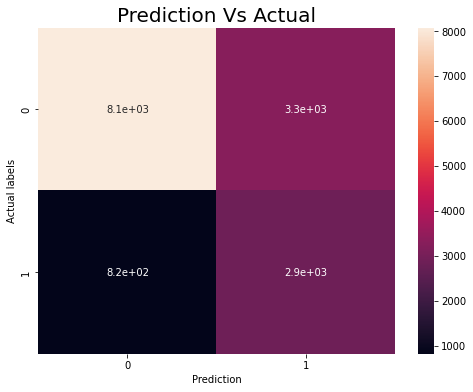

In [54]:
svc_classifier_1 = SVC(kernel='linear',class_weight={0 : 1,  1 : 3})
svc_classifier_1.fit(X_train,y_train)
y_pred = svc_classifier_1.predict(X_test)

print("Overall Accuracy : ",round(accuracy_score(y_test,y_pred),4))
print("Precision        : ",round(precision_score(y_test,y_pred),4))
print("Recall           : ",round(recall_score(y_test,y_pred),4))
print("AUC Score        : ",round(roc_auc_score(y_test,y_pred),4))
print("Confusion Matrix :")

plt.figure(figsize = (8,6))
confu_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(data = confu_matrix,
            annot=True,
            )
plt.xlabel("Prediction")
plt.ylabel("Actual labels")
plt.title("Prediction Vs Actual",size = 20)

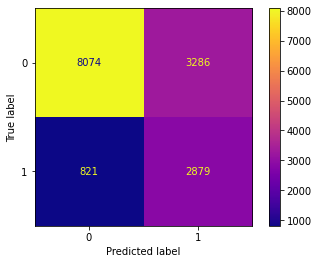

In [55]:
plot_confusion_matrix(svc_classifier_1, X_test, y_test, cmap="plasma")

##  Kernel - Rbf
### Model Training with scaling | Model Testing | Model Evaluation 

Overall Accuracy :  0.7744
Precision        :  0.5253
Recall           :  0.8481
AUC Score        :  0.7992
Confusion Matrix :


Text(0.5, 1.0, 'Prediction Vs Actual')

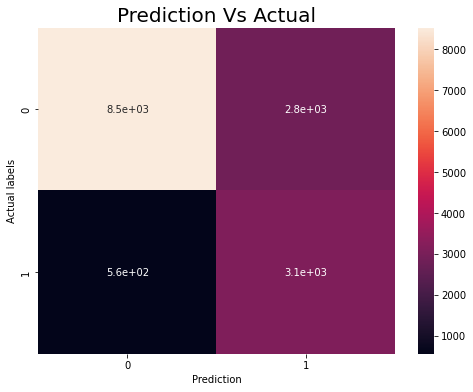

In [56]:
svc_classifier_1 = SVC(kernel='rbf',class_weight={0 : 1,  1 : 3})
svc_classifier_1.fit(X_train,y_train)
y_pred = svc_classifier_1.predict(X_test)

print("Overall Accuracy : ",round(accuracy_score(y_test,y_pred),4))
print("Precision        : ",round(precision_score(y_test,y_pred),4))
print("Recall           : ",round(recall_score(y_test,y_pred),4))
print("AUC Score        : ",round(roc_auc_score(y_test,y_pred),4))
print("Confusion Matrix :")

plt.figure(figsize = (8,6))
confu_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(data = confu_matrix,
            annot=True,
            )
plt.xlabel("Prediction")
plt.ylabel("Actual labels")
plt.title("Prediction Vs Actual",size = 20)

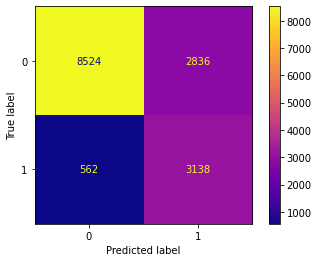

In [57]:
plot_confusion_matrix(svc_classifier_1, X_test, y_test, cmap="plasma")

##   Kernel - Polynomial
### Model Training with scaling | Model Testing | Model Evaluation

Overall Accuracy :  0.7586
Precision        :  0.5054
Recall           :  0.8276
AUC Score        :  0.7819
Confusion Matrix :


Text(0.5, 1.0, 'Prediction Vs Actual')

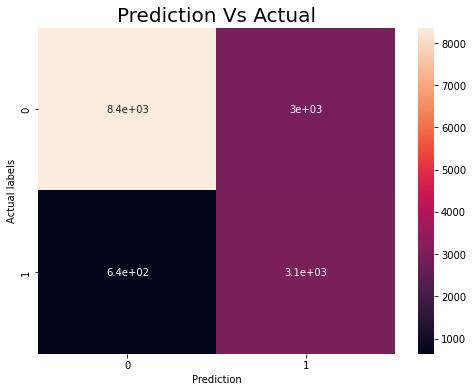

In [58]:
svc_classifier_1 = SVC(kernel='poly',class_weight={0 : 1,  1 : 3})
svc_classifier_1.fit(X_train,y_train)
y_pred = svc_classifier_1.predict(X_test)

print("Overall Accuracy : ",round(accuracy_score(y_test,y_pred),4))
print("Precision        : ",round(precision_score(y_test,y_pred),4))
print("Recall           : ",round(recall_score(y_test,y_pred),4))
print("AUC Score        : ",round(roc_auc_score(y_test,y_pred),4))
print("Confusion Matrix :")

plt.figure(figsize = (8,6))
confu_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(data = confu_matrix,
            annot=True,
            )
plt.xlabel("Prediction")
plt.ylabel("Actual labels")
plt.title("Prediction Vs Actual",size = 20)

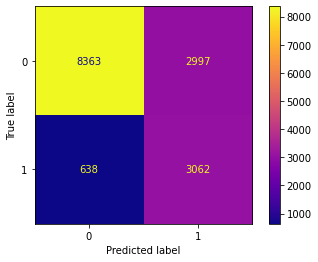

In [59]:
plot_confusion_matrix(svc_classifier_1, X_test, y_test, cmap="plasma")

###  Observation 
###   1.Polynomial Kernel performs good :  
###   2.RBF  Kernel performs good :


### Key features:

### 1.Good accuracy score
### 2. small number of Misclassification

# Understanding the Pattern of the data

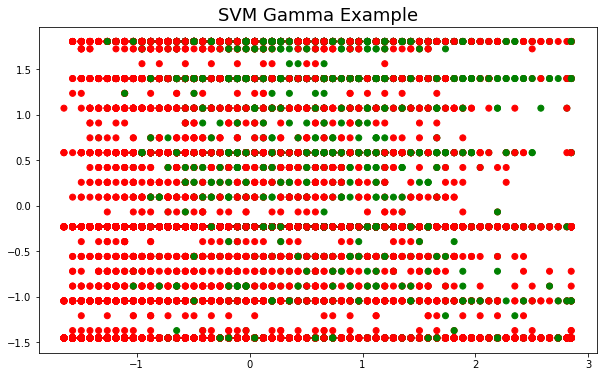

In [60]:
plt.figure(figsize=(10,6))
plt.title("SVM Gamma Example", fontsize=18)
plt.scatter(X_train.iloc[:,0], X_train.iloc[:,11], c=y_train.values, cmap=zero_one_colourmap)
plt.show()

# Decision Boundary Plotting : Visualisation

# Decision Boundary Function:

# Contour Plot Function

In [61]:
def plot_decision_boundary(X_train_1, y_train_1, clf):
    X_set, y_set = X_train_1, y_train_1
    X1, X2 = np.meshgrid(np.arange(start = X_set.iloc[:, 0].min() - 1, 
                                 stop = X_set.iloc[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set.iloc[:, 1].min() - 1, 
                                 stop = X_set.iloc[:, 1].max() + 1, 
                                 step = 0.01))
    plt.figure(figsize=(10,6))
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    
    plt.scatter(X_train_1.iloc[:,0],X_train_1.iloc[:,1], c=y_train_1.values, cmap=zero_one_colourmap)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

 # 1. Linear Kernel

In [62]:
svc_classifier_2 = SVC(kernel='linear',class_weight={0 : 1,  1 : 3})
svc_classifier_2.fit(X_train_1,y_train_1)

SVC(class_weight={0: 1, 1: 3}, kernel='linear')

No handles with labels found to put in legend.


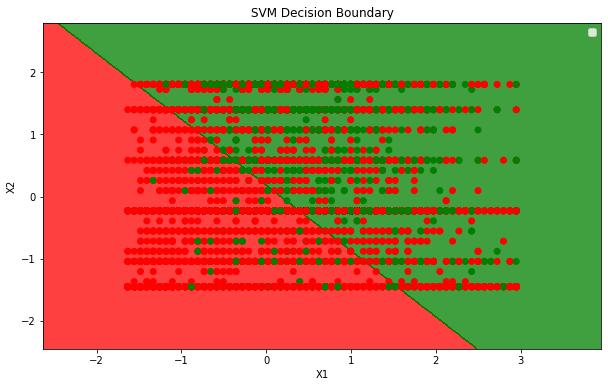

In [63]:
plot_decision_boundary(X_test_1,y_test_1, svc_classifier_2)

# 2. Rbf Kernel

In [64]:
svc_classifier_3 = SVC(kernel='rbf',class_weight={0 : 1,  1 : 3})
svc_classifier_3.fit(X_train_1,y_train_1)

SVC(class_weight={0: 1, 1: 3})

No handles with labels found to put in legend.


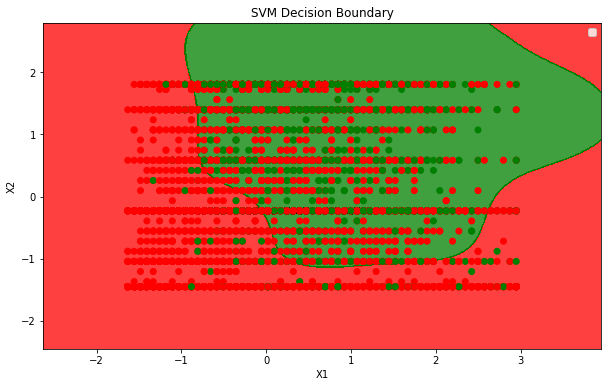

In [65]:
plot_decision_boundary(X_test_1,y_test_1, svc_classifier_3)

# 3. Polynomial Kernel

In [66]:
svc_classifier_4 = SVC(kernel='poly',class_weight={0 : 1,  1 : 3})
svc_classifier_4.fit(X_train_1,y_train_1)

SVC(class_weight={0: 1, 1: 3}, kernel='poly')

No handles with labels found to put in legend.


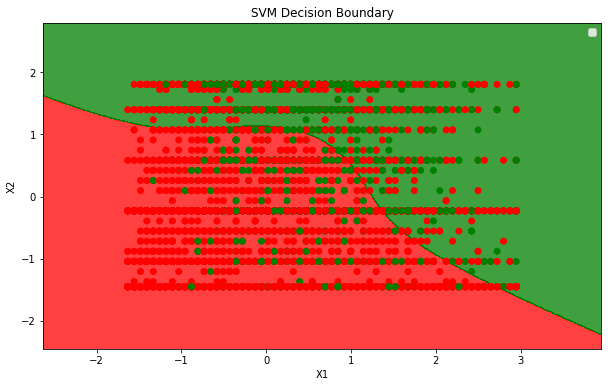

In [67]:
plot_decision_boundary(X_test_1,y_test_1, svc_classifier_4)

# Tweaking the Hyper Parameters

###  Using different values of    C   and  GAMMA

## Rbf Kernel

In [68]:
svc_classifier_3 = SVC(kernel='rbf',class_weight={0 : 1,  1 : 3}, C=2.0,  gamma=1.0)
svc_classifier_3.fit(X_train_1,y_train_1)

SVC(C=2.0, class_weight={0: 1, 1: 3}, gamma=1.0)

No handles with labels found to put in legend.


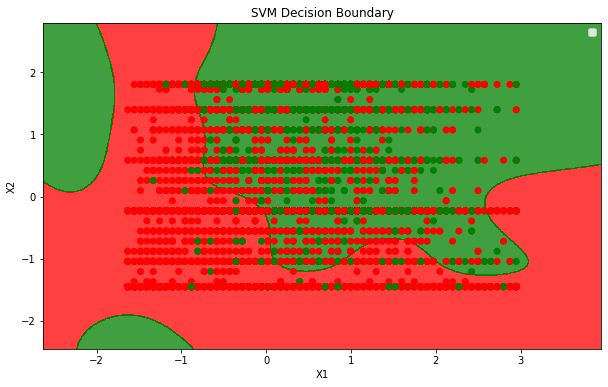

In [69]:
plot_decision_boundary(X_test_1,y_test_1, svc_classifier_3)

In [70]:
svc_classifier_3 = SVC(kernel='rbf',class_weight={0 : 1,  1 : 3}, C=5.0,  gamma=1.0)
svc_classifier_3.fit(X_train_1,y_train_1)

SVC(C=5.0, class_weight={0: 1, 1: 3}, gamma=1.0)

No handles with labels found to put in legend.


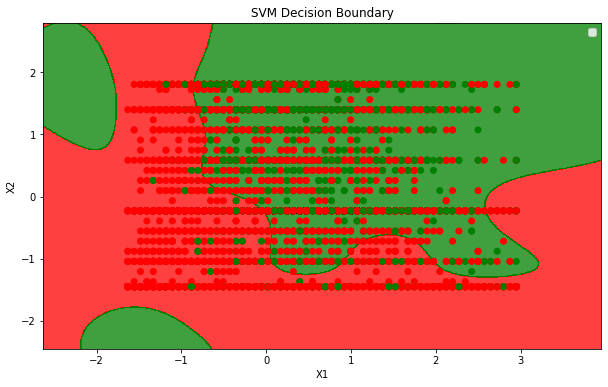

In [71]:
plot_decision_boundary(X_test_1,y_test_1, svc_classifier_3)

In [72]:
svc_classifier_3 = SVC(kernel='rbf',class_weight={0 : 1,  1 : 3}, C=5.0,  gamma=2.0)
svc_classifier_3.fit(X_train_1,y_train_1)

SVC(C=5.0, class_weight={0: 1, 1: 3}, gamma=2.0)

No handles with labels found to put in legend.


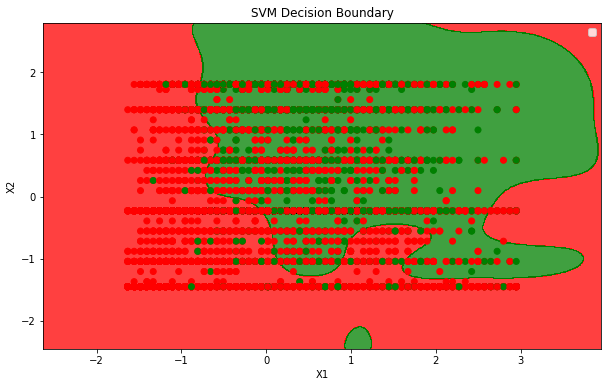

In [73]:
plot_decision_boundary(X_test_1,y_test_1, svc_classifier_3)

##  Polynomial Kernel

In [74]:
svc_classifier_4 = SVC(kernel='poly',class_weight={0 : 1,  1 : 3}, C=2.0,  gamma=2.0)
svc_classifier_4.fit(X_train_1,y_train_1)

SVC(C=2.0, class_weight={0: 1, 1: 3}, gamma=2.0, kernel='poly')

No handles with labels found to put in legend.


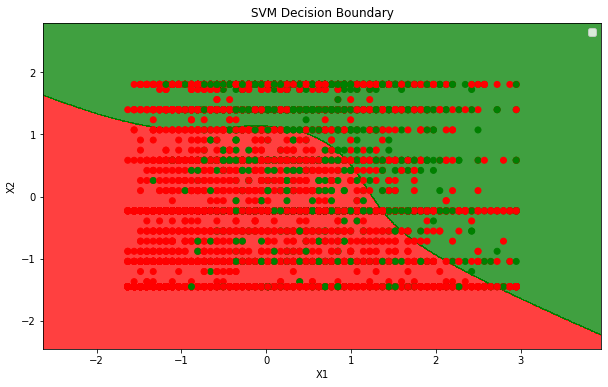

In [75]:
plot_decision_boundary(X_test_1,y_test_1, svc_classifier_4)

In [76]:
svc_classifier_4 = SVC(kernel='poly',class_weight={0 : 1,  1 : 3}, C=5.0,  gamma=2.0)
svc_classifier_4.fit(X_train_1,y_train_1)

SVC(C=5.0, class_weight={0: 1, 1: 3}, gamma=2.0, kernel='poly')

No handles with labels found to put in legend.


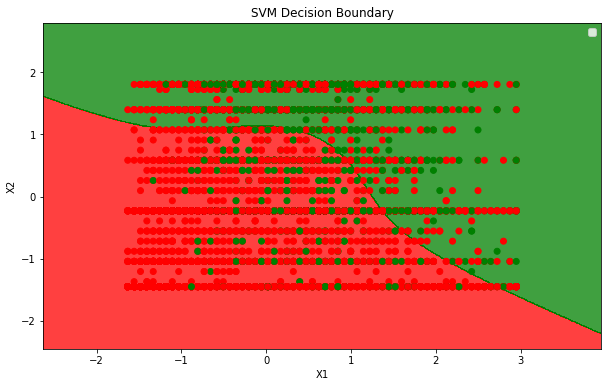

In [77]:
plot_decision_boundary(X_test_1,y_test_1, svc_classifier_4)

# **Final Model**

In [78]:
svc_classifier_4 = SVC(kernel='poly',class_weight={0 : 1,  1 : 3}, C=10,  gamma=2.0)
svc_classifier_4.fit(X_train_1,y_train_1)

SVC(C=10, class_weight={0: 1, 1: 3}, gamma=2.0, kernel='poly')

No handles with labels found to put in legend.


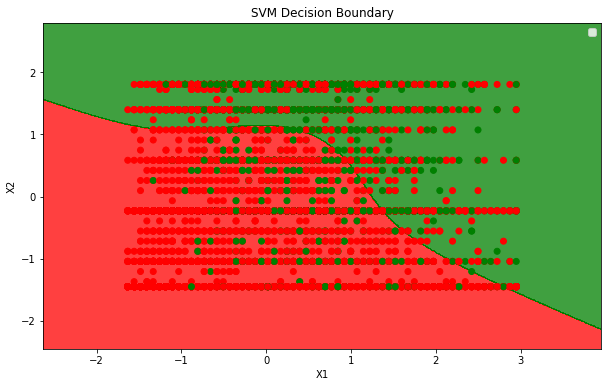

In [79]:
plot_decision_boundary(X_test_1,y_test_1, svc_classifier_4)

### Observation
####  Gamma which is a measure of curvature ,if the value of gamma is comperatively high then less number of points clubbed together  or simmilarity distance is small ...
####  C value  which is a penalty parameter ,the more the value of c the lesser the margin  with less number of misclassification


###  So by tweaking these two parameters :
####  1. we get better accuracy
####  2. less number of misclassification

In [80]:
svc_classifier_4.classes_

array([0, 1])

In [81]:
svc_classifier_4.decision_function

<bound method BaseSVC.decision_function of SVC(C=10, class_weight={0: 1, 1: 3}, gamma=2.0, kernel='poly')>

***Support Vectors***

In [82]:
vec=svc_classifier_4.support_vectors_
vec

array([[ 0.04570607, -0.23094905],
       [-0.03106078, -0.23094905],
       [ 1.12044197, -0.23094905],
       ...,
       [ 1.12044197, -0.23094905],
       [ 0.12247292, -0.23094905],
       [ 1.04367512, -0.23094905]])

  **Plot the Support Vectors**

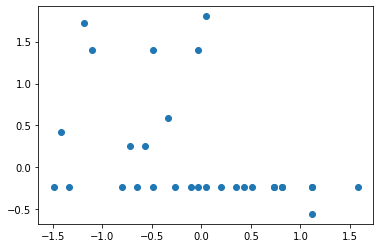

In [83]:
plt.scatter(vec[0:30,0],vec[0:30,1],cmap='rainbow',label="support_vecs")

**Original Data with Support Vectors**

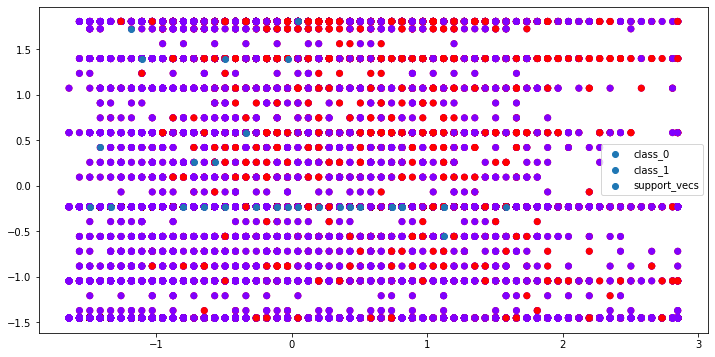

In [84]:
plt.figure(figsize=(12,6))
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,11], c=y_train.values==0, label="class_0",cmap='rainbow')
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,11], label="class_1", c=y_train.values==1,cmap='rainbow')
plt.scatter(vec[0:30,0],vec[0:30,1],cmap='rainbow',label="support_vecs")
plt.legend(loc="best")